### Library Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline

### Dataset Imports

In [3]:
%%time
train = pd.read_csv('D:/Downloads/final-year-project/data/train.csv')
weather_train = pd.read_csv('D:/Downloads/final-year-project/data/weather_train.csv')
test = pd.read_csv('D:/Downloads/final-year-project/data/test.csv')
weather_test = pd.read_csv('D:/Downloads/final-year-project/data/weather_test.csv')
building = pd.read_csv('D:/Downloads/final-year-project/data/building_metadata.csv')

CPU times: total: 15.6 s
Wall time: 17.2 s


In [6]:
dataset = pd.read_csv('D:/Downloads/final-year-project/data/preprocessed_train_data.csv')


In [15]:
haah = pd.read_csv('D:/Downloads/final-year-project/data/sample_submission.csv')

In [16]:
haah

row_id  meter_reading
0                0              0
1                1              0
2                2              0
3                3              0
4                4              0
...            ...            ...
41697595  41697595              0
41697596  41697596              0
41697597  41697597              0
41697598  41697598              0
41697599  41697599              0

[41697600 rows x 2 columns]

In [13]:

 # Define the columns to check for zero values
columns_to_check = ['cloud_coverage', 'dew_temperature', 'air_temperature', 'precip_depth_1_hr', 'wind_direction', 'wind_speed']
    
# Filter out rows where the specified columns have values equal to 0
filtered_dataset = dataset[~(dataset[columns_to_check] == 0).any(axis=1)]
final = filtered_dataset.dropna()
final

Unnamed: 0  building_id  meter            timestamp  meter_reading  \
10226         204695            7      1  2016-03-19 18:00:00      2912.5100   
10227         204698            9      1  2016-03-19 18:00:00         0.0000   
10228         204703           13      1  2016-03-19 18:00:00      1941.6800   
10229         204705           14      1  2016-03-19 18:00:00      2490.4100   
10230         204707           15      1  2016-03-19 18:00:00      1477.3600   
...              ...          ...    ...                  ...            ...   
13972443    20040030         1448      0  2016-12-19 12:00:00         4.0750   
14035491    20124615         1400      1  2016-02-11 07:00:00         2.6165   
14035605    20124729         1400      1  2016-02-16 05:00:00         1.1688   
14036027    20125151         1400      1  2016-03-05 02:00:00         1.4224   
14036466    20125590         1400      1  2016-03-24 01:00:00         3.8946   

          site_id  primary_use  square_feet  air_temperature  cloud_coverage  \
10226           0            0       121074             20.0             8.0   
10227           0            6        27000             20.0             8.0   
10228           0            0        99380             20.0             8.0   
10229           0            0        86250             20.0             8.0   
10230           0            6        83957             20.0             8.0   
...           ...          ...          ...              ...             ...   
13972443       15            6        92271            -14.4             4.0   
14035491       15            4        21168             -8.9             4.0   
14035605       15            4        21168             -3.9             4.0   
14036027       15            4        21168             -5.0             4.0   
14036466       15            4        21168              1.1             9.0   

          dew_temperature  precip_depth_1_hr  sea_level_pressure  \
10226                17.8                3.0              1013.3   
10227                17.8                3.0              1013.3   
10228                17.8                3.0              1013.3   
10229                17.8                3.0              1013.3   
10230                17.8                3.0              1013.3   
...                   ...                ...                 ...   
13972443            -16.7               -1.0              1041.0   
14035491            -14.4               -1.0              1009.4   
14035605             -5.0                3.0              1016.0   
14036027            -10.0               -1.0              1022.4   
14036466              1.1               -1.0              1020.2   

          wind_direction  wind_speed  day  month  hour  
10226              350.0         4.6   19      3    18  
10227              350.0         4.6   19      3    18  
10228              350.0         4.6   19      3    18  
10229              350.0         4.6   19      3    18  
10230              350.0         4.6   19      3    18  
...                  ...         ...  ...    ...   ...  
13972443           150.0         1.5   19     12    12  
14035491           280.0         7.7   11      2     7  
14035605           150.0         3.1   16      2     5  
14036027            10.0         3.1    5      3     2  
14036466           300.0         4.1   24      3     1  

[174983 rows x 18 columns]

In [13]:
train = train.merge(building, on='building_id', how='left')
test = test.merge(building, on='building_id', how='left')

train = train.merge(weather_train, on=['site_id', 'timestamp'], how='left')
test = test.merge(weather_test, on=['site_id', 'timestamp'], how='left')
del weather_train, weather_test,building
gc.collect();

In [14]:
import pandas as pd
import numpy as np

# Assuming 'train' and 'test' are your datasets

# Convert timestamp to datetime
train["timestamp"] = pd.to_datetime(train["timestamp"])
test["timestamp"] = pd.to_datetime(test["timestamp"])

# Extract hour, day, weekday, and month
train["hour"] = np.uint8(train["timestamp"].dt.hour)
train["day"] = np.uint8(train["timestamp"].dt.day)
train["weekday_name"] = train["timestamp"].dt.day_name()  # Updated to use day_name()
train["weekday"] = np.uint8(train["timestamp"].dt.weekday)
train["month"] = np.uint8(train["timestamp"].dt.month)

test["hour"] = np.uint8(test["timestamp"].dt.hour)
test["day"] = np.uint8(test["timestamp"].dt.day)
test["weekday_name"] = test["timestamp"].dt.day_name()  # Updated to use day_name()
test["weekday"] = np.uint8(test["timestamp"].dt.weekday)
test["month"] = np.uint8(test["timestamp"].dt.month)


### Mean meter reading by building_id

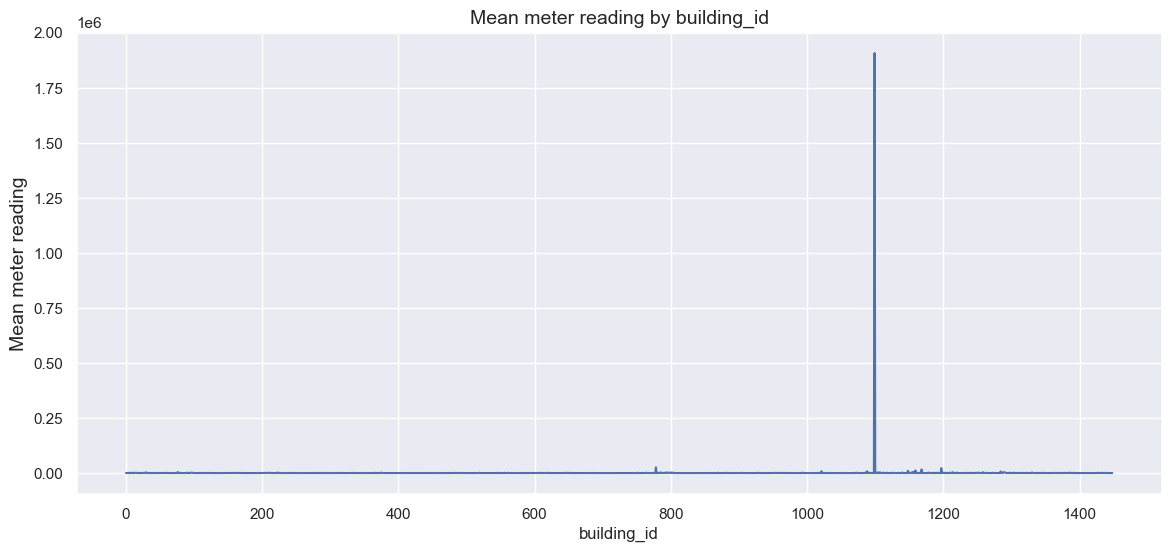

In [8]:
# Convert 'timestamp' column to datetime format
train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])

fig, axes = plt.subplots(1,1,figsize=(14, 6))
train.groupby('building_id')['meter_reading'].mean().plot();
axes.set_title('Mean meter reading by building_id', fontsize=14);
axes.set_ylabel('Mean meter reading', fontsize=14);

### Air Temperature Across Timestamp

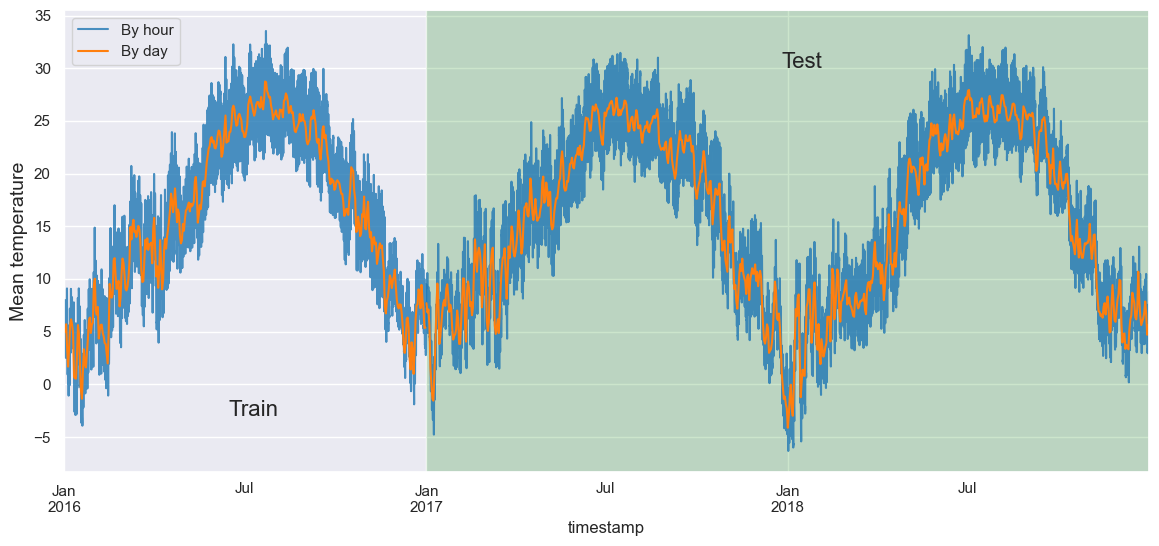

In [16]:
# Convert 'timestamp' column to datetime format
train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
train[['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes, alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean temperature', fontsize=14);
test[['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes, alpha=0.8, color='tab:blue', label='');
train[['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes, alpha=1, label='By day', color='tab:orange');
test[['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes, alpha=1, color='tab:orange', label='');
axes.legend();
axes.text(train['timestamp'].iloc[9000000], -3, 'Train', fontsize=16);
axes.text(test['timestamp'].iloc[29400000], 30, 'Test', fontsize=16);
axes.axvspan(test['timestamp'].min(), test['timestamp'].max(), facecolor='green', alpha=0.2);

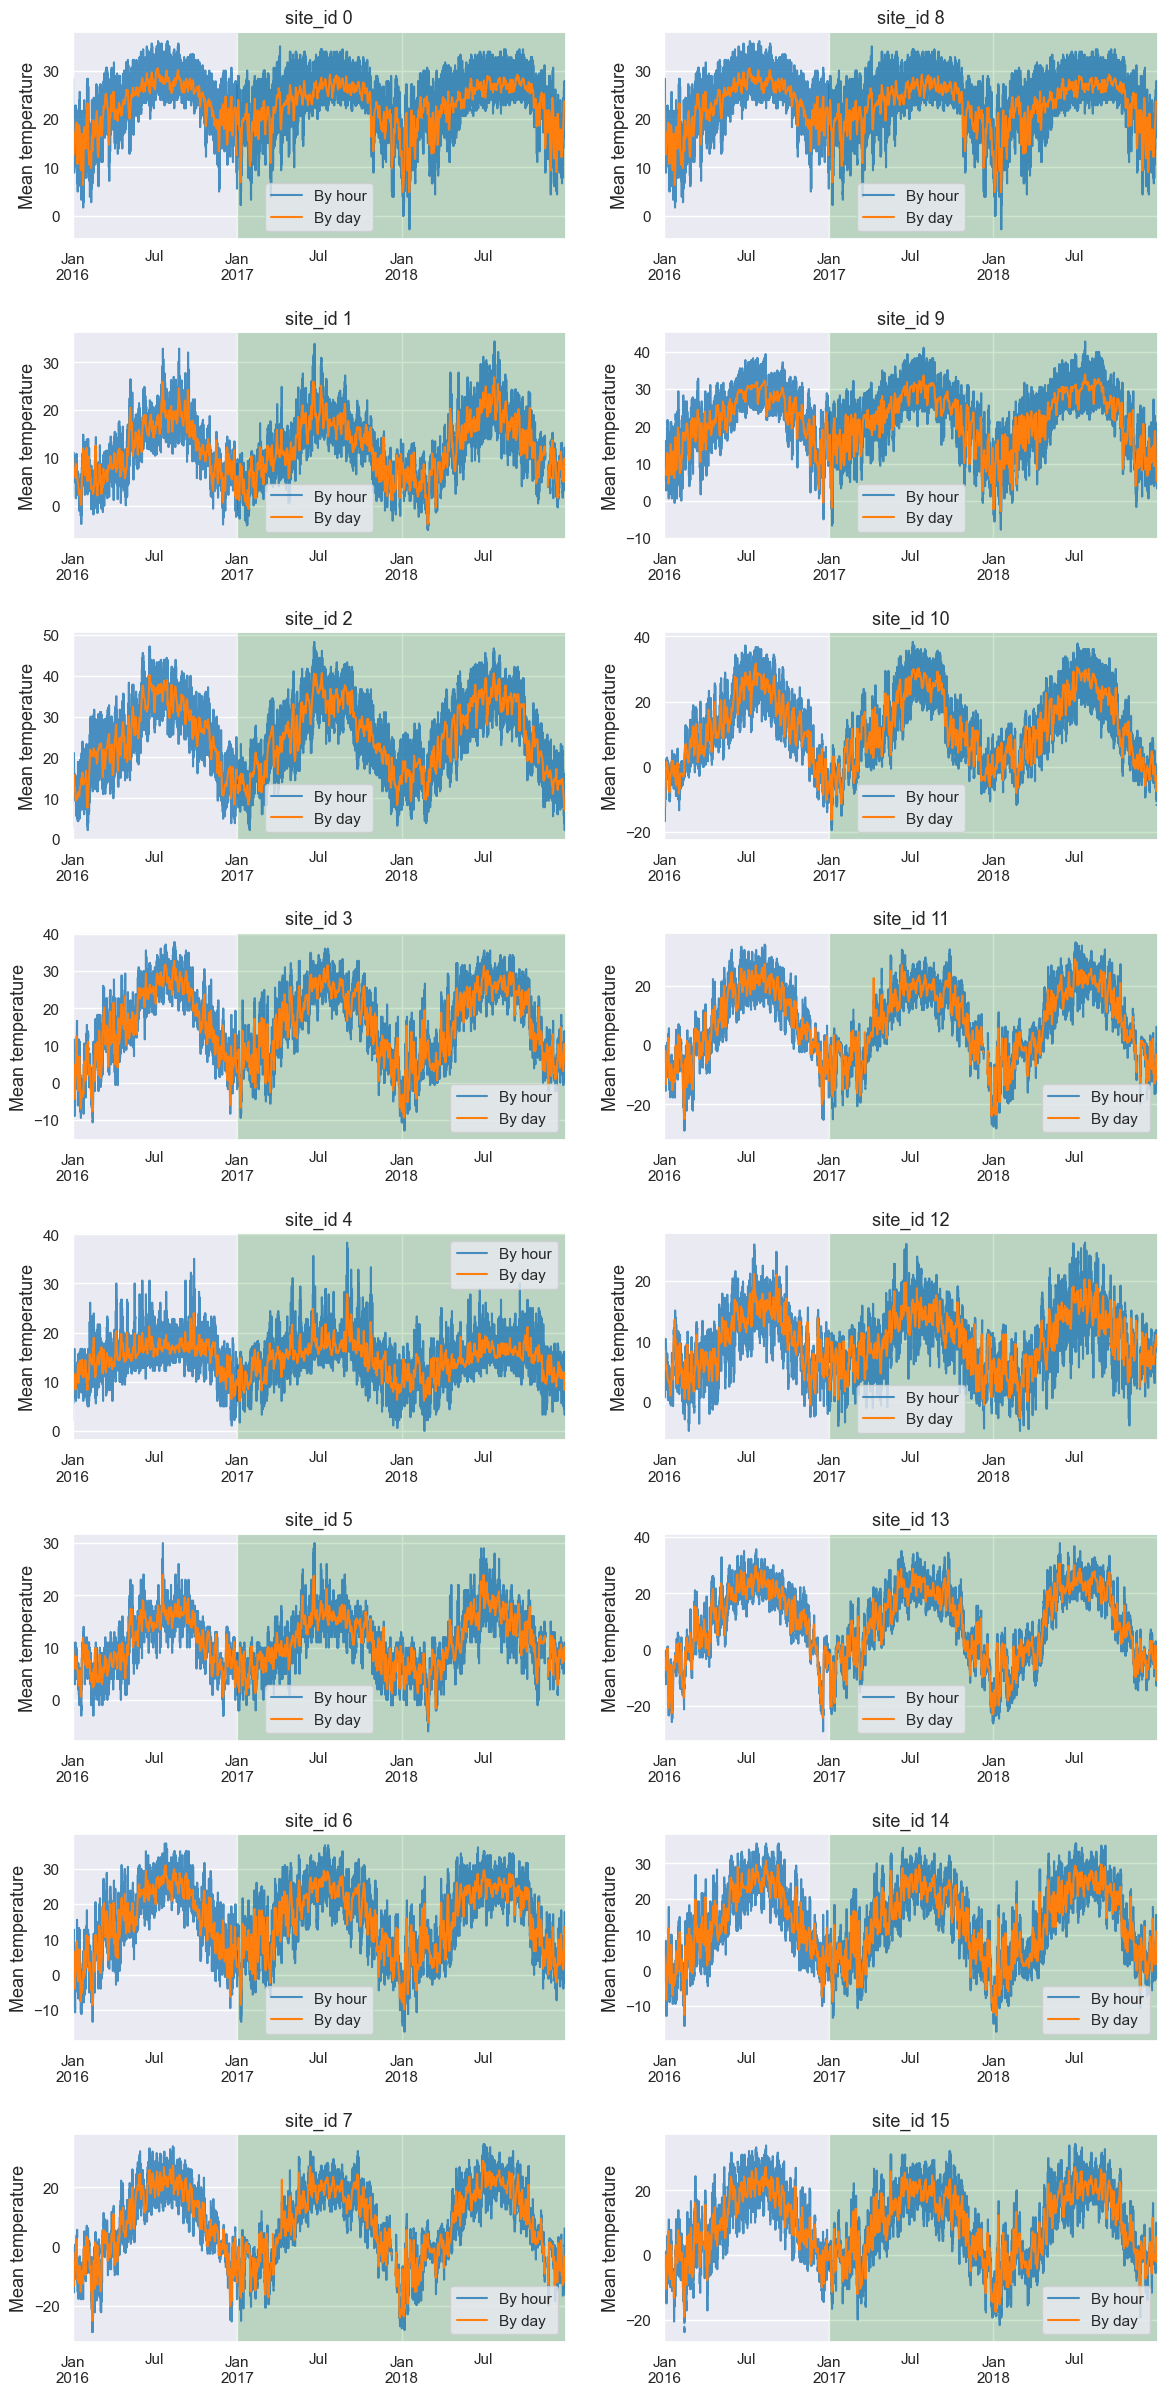

In [17]:
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i in range(train['site_id'].nunique()):
    train[train['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean temperature', fontsize=13);
    test[test['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('H').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=0.8, color='tab:blue', label='').set_xlabel('')
    train[train['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange')
    test[test['site_id'] == i][['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes[i%8][i//8], alpha=1, color='tab:orange', label='').set_xlabel('')
    axes[i%8][i//8].legend();
    axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
    axes[i%8][i//8].axvspan(test['timestamp'].min(), test['timestamp'].max(), facecolor='green', alpha=0.2);
    plt.subplots_adjust(hspace=0.45)

### Wind Direction and Wind Speed

In [18]:
print('Number of observations with 0 degree direction in TRAIN: {} ({:.2f}%)'.format(train[train['wind_direction'] == 0].shape[0], train[train['wind_direction'] == 0].shape[0] / len(train)))
print('Number of observations with 0 degree direction in TEST: {} ({:.2f}%)'.format(test[test['wind_direction'] == 0].shape[0], test[test['wind_direction'] == 0].shape[0] / len(test)))
print('Number of observations with 360 degree direction in TRAIN: {} ({:.2f}%)'.format(train[train['wind_direction'] == 360].shape[0], train[train['wind_direction'] == 360].shape[0] / len(train)))
print('Number of observations with 360 degree direction in TEST: {} ({:.2f}%)'.format(test[test['wind_direction'] == 360].shape[0], test[test['wind_direction'] == 360].shape[0] / len(test)))

Number of observations with 0 degree direction in TRAIN: 2373540 (0.12%)
Number of observations with 0 degree direction in TEST: 4796510 (0.12%)
Number of observations with 360 degree direction in TRAIN: 421533 (0.02%)
Number of observations with 360 degree direction in TEST: 813553 (0.02%)


In [19]:
print('Number of observations that have calm conditions in TRAIN: {} ({:.2f}%)'.format(train[train['wind_speed'] == 0].shape[0], train[train['wind_speed'] == 0].shape[0] / len(train)))
print('Number of observations that have calm conditions in TEST: {} ({:.2f}%)'.format(test[test['wind_speed'] == 0].shape[0], test[test['wind_speed'] == 0].shape[0] / len(test)))

Number of observations that have calm conditions in TRAIN: 2384761 (0.12%)
Number of observations that have calm conditions in TEST: 4822497 (0.12%)


### Amount of data and NaNs

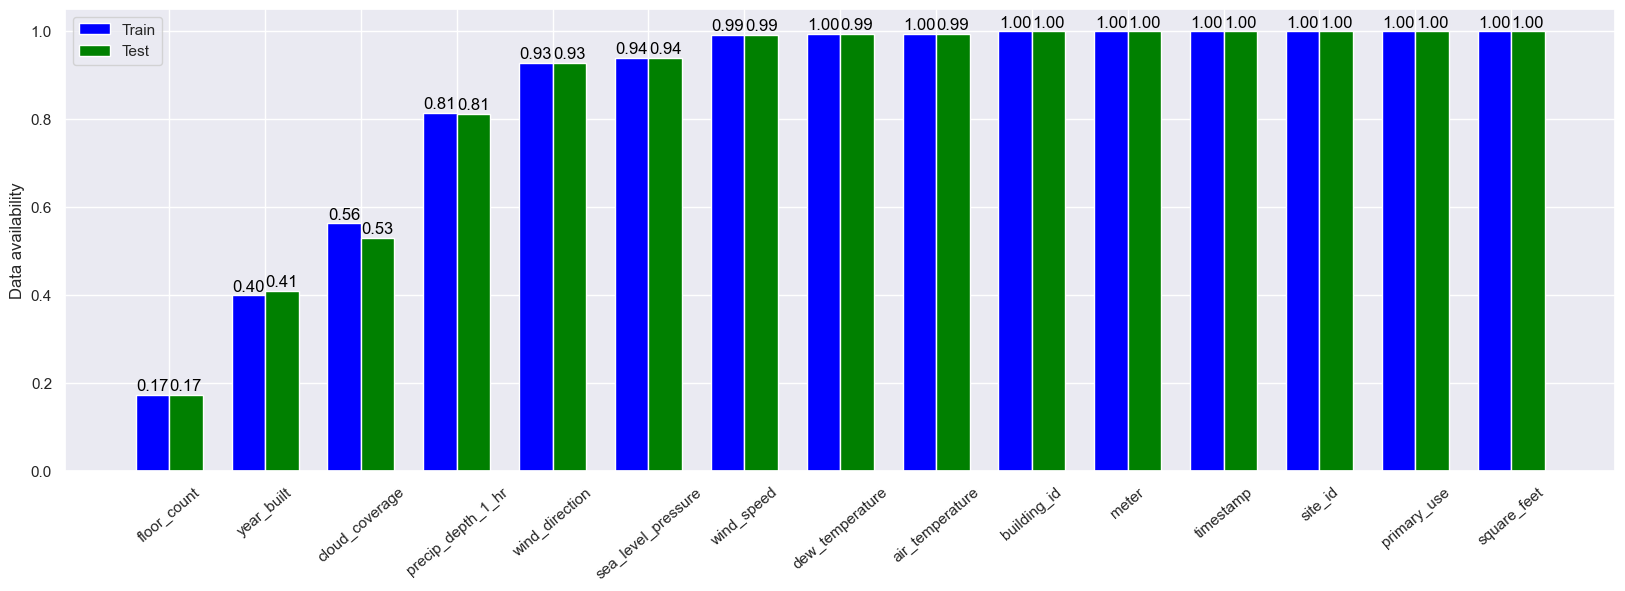

In [29]:
train_data = (train.count() / len(train)).drop('meter_reading').sort_values().values
ind = np.arange(len(train_data))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(20, 6), dpi=100)
tr = axes.bar(ind, train_data, width, color='blue')

test_data = (test.count() / len(test)).drop('row_id').sort_values().values
tt = axes.bar(ind+width, test_data, width, color='green')

axes.set_ylabel('Data availability');
axes.set_xticks(ind + width / 2)
axes.set_xticklabels((train.count() / len(train)).drop('meter_reading').sort_values().index, rotation=40)
axes.legend([tr, tt], ['Train', 'Test'])

# Adding annotations
for i, v in enumerate(train_data):
    axes.text(i - 0.17, v + 0.01, "{:.2f}".format(v), color='black')
for i, v in enumerate(test_data):
    axes.text(i + 0.18, v + 0.01, "{:.2f}".format(v), color='black')


### Data Understanding

What are the factors that can leads to high building energy consumption?

In [5]:
data = pd.read_csv('D:/Downloads/final-year-project/data/final_subset_train_data.csv')

Minimum Meter Reading above the 95th Percentile: 814.674
Minimum Meter Reading with a Z-score greater than 2: 987.28


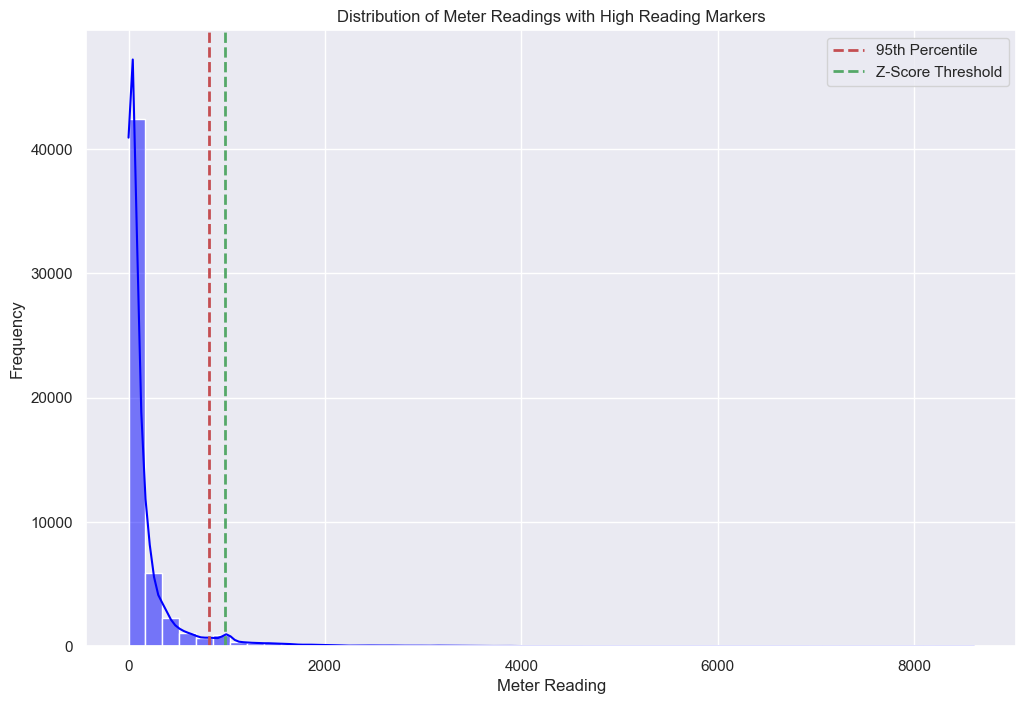

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Percentile-Based Approach
percentile_95 = data['meter_reading'].quantile(0.95)

# Z-Score Analysis
data['z_score'] = zscore(data['meter_reading'])
z_score_threshold = 2  # Typically 2 or 3 standard deviations

# Identify the minimum meter reading above the 95th percentile
min_high_meter_reading_percentile = data[data['meter_reading'] > percentile_95]['meter_reading'].min()
print(f"Minimum Meter Reading above the 95th Percentile: {min_high_meter_reading_percentile}")

# Identify the minimum meter reading with a Z-score greater than 2
min_high_meter_reading_zscore = data[data['z_score'] > z_score_threshold]['meter_reading'].min()
print(f"Minimum Meter Reading with a Z-score greater than 2: {min_high_meter_reading_zscore}")

# Visualize Distribution with Markers
plt.figure(figsize=(12, 8))
sns.histplot(data['meter_reading'], bins=50, kde=True, color='blue')
plt.axvline(percentile_95, color='r', linestyle='--', linewidth=2, label='95th Percentile')
plt.axvline(data['meter_reading'].mean() + z_score_threshold * data['meter_reading'].std(), color='g', linestyle='--', linewidth=2, label='Z-Score Threshold')
plt.title('Distribution of Meter Readings with High Reading Markers')
plt.xlabel('Meter Reading')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [28]:
# Minimum meter readings from the two methods
min_high_meter_reading_percentile = 814.674
min_high_meter_reading_zscore = 987.28

# Calculate the mean of these values
mean_high_meter_reading = (min_high_meter_reading_percentile + min_high_meter_reading_zscore) / 2
print(f"Mean of Minimum High Meter Readings: {mean_high_meter_reading}")


Mean of Minimum High Meter Readings: 900.977


### Meter Type

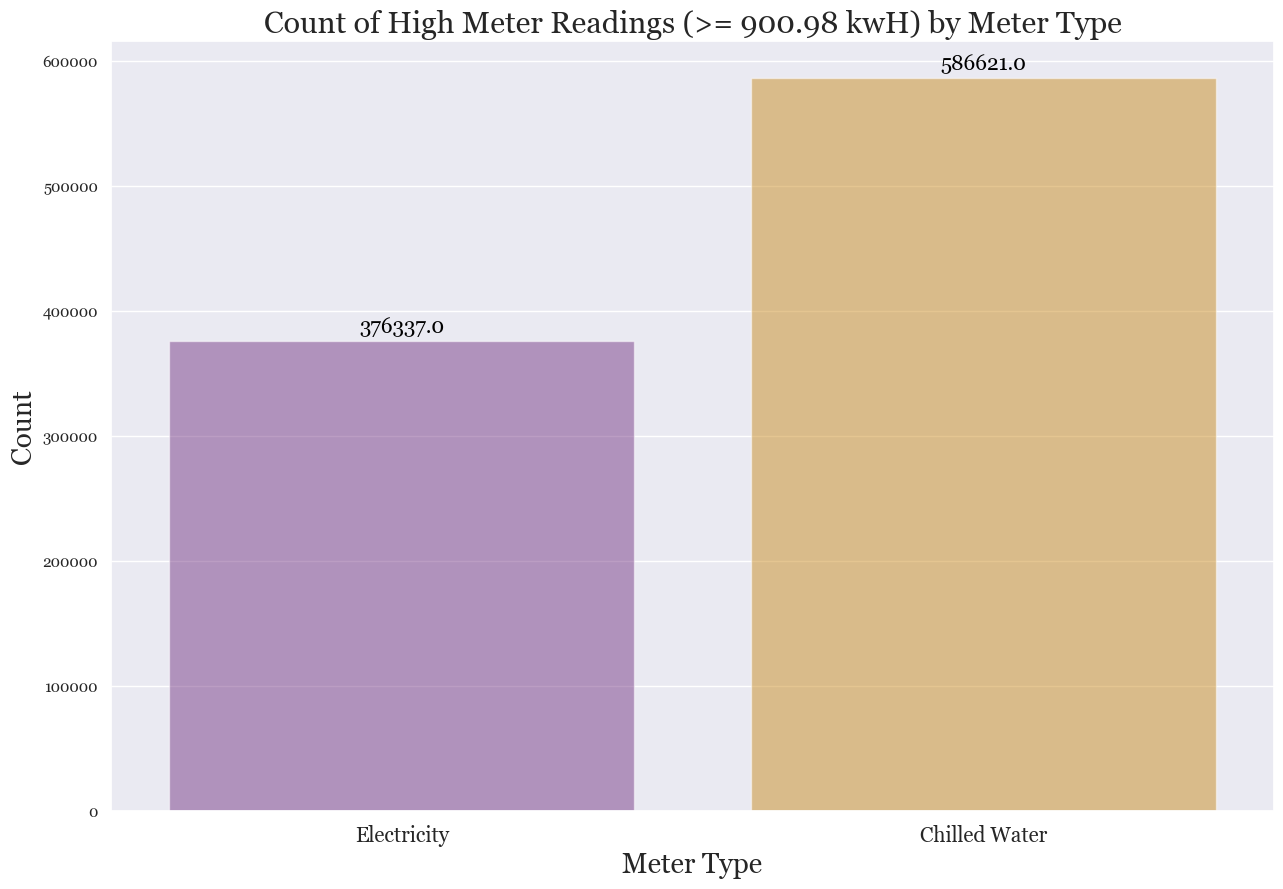

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter out meter types 2 and 3 and meter readings greater than 900.977
filtered_data = train[~train['meter'].isin([2, 3])]
high_meter_data = filtered_data[filtered_data['meter_reading'] > mean_high_meter_reading]

# Set the figure size and font
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.family'] = 'Georgia'

# Create the countplot
ax = sns.countplot(data=high_meter_data, x='meter', palette='CMRmap', alpha=0.5)

# Set the labels
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Meter Type', fontsize=20)

# Customize the x-axis labels
ax.set_xticklabels(['Electricity', 'Chilled Water'], fontsize=15)

# Display the actual counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=15, color='black', xytext=(0, 10),
                textcoords='offset points')

# Show the plot
plt.title('Count of High Meter Readings (>= 900.98 kwH) by Meter Type', fontsize=22)
plt.show()


In [52]:
train

building_id  meter           timestamp  meter_reading  site_id  \
0                   0      0 2016-01-01 00:00:00          0.000        0   
1                   1      0 2016-01-01 00:00:00          0.000        0   
2                   2      0 2016-01-01 00:00:00          0.000        0   
3                   3      0 2016-01-01 00:00:00          0.000        0   
4                   4      0 2016-01-01 00:00:00          0.000        0   
...               ...    ...                 ...            ...      ...   
20216095         1444      0 2016-12-31 23:00:00          8.750       15   
20216096         1445      0 2016-12-31 23:00:00          4.825       15   
20216097         1446      0 2016-12-31 23:00:00          0.000       15   
20216098         1447      0 2016-12-31 23:00:00        159.575       15   
20216099         1448      0 2016-12-31 23:00:00          2.850       15   

                            primary_use  square_feet  year_built  floor_count  \
0                             Education         7432      2008.0          NaN   
1                             Education         2720      2004.0          NaN   
2                             Education         5376      1991.0          NaN   
3                             Education        23685      2002.0          NaN   
4                             Education       116607      1975.0          NaN   
...                                 ...          ...         ...          ...   
20216095  Entertainment/public assembly        19619      1914.0          NaN   
20216096                      Education         4298         NaN          NaN   
20216097  Entertainment/public assembly        11265      1997.0          NaN   
20216098            Lodging/residential        29775      2001.0          NaN   
20216099                         Office        92271      2001.0          NaN   

          air_temperature  cloud_coverage  dew_temperature  precip_depth_1_hr  \
0                    25.0             6.0             20.0                NaN   
1                    25.0             6.0             20.0                NaN   
2                    25.0             6.0             20.0                NaN   
3                    25.0             6.0             20.0                NaN   
4                    25.0             6.0             20.0                NaN   
...                   ...             ...              ...                ...   
20216095              1.7             NaN             -5.6               -1.0   
20216096              1.7             NaN             -5.6               -1.0   
20216097              1.7             NaN             -5.6               -1.0   
20216098              1.7             NaN             -5.6               -1.0   
20216099              1.7             NaN             -5.6               -1.0   

          sea_level_pressure  wind_direction  wind_speed  
0                     1019.7             0.0         0.0  
1                     1019.7             0.0         0.0  
2                     1019.7             0.0         0.0  
3                     1019.7             0.0         0.0  
4                     1019.7             0.0         0.0  
...                      ...             ...         ...  
20216095              1008.5           180.0         8.8  
20216096              1008.5           180.0         8.8  
20216097              1008.5           180.0         8.8  
20216098              1008.5           180.0         8.8  
20216099              1008.5           180.0         8.8  

[20216100 rows x 16 columns]

## Primary Used

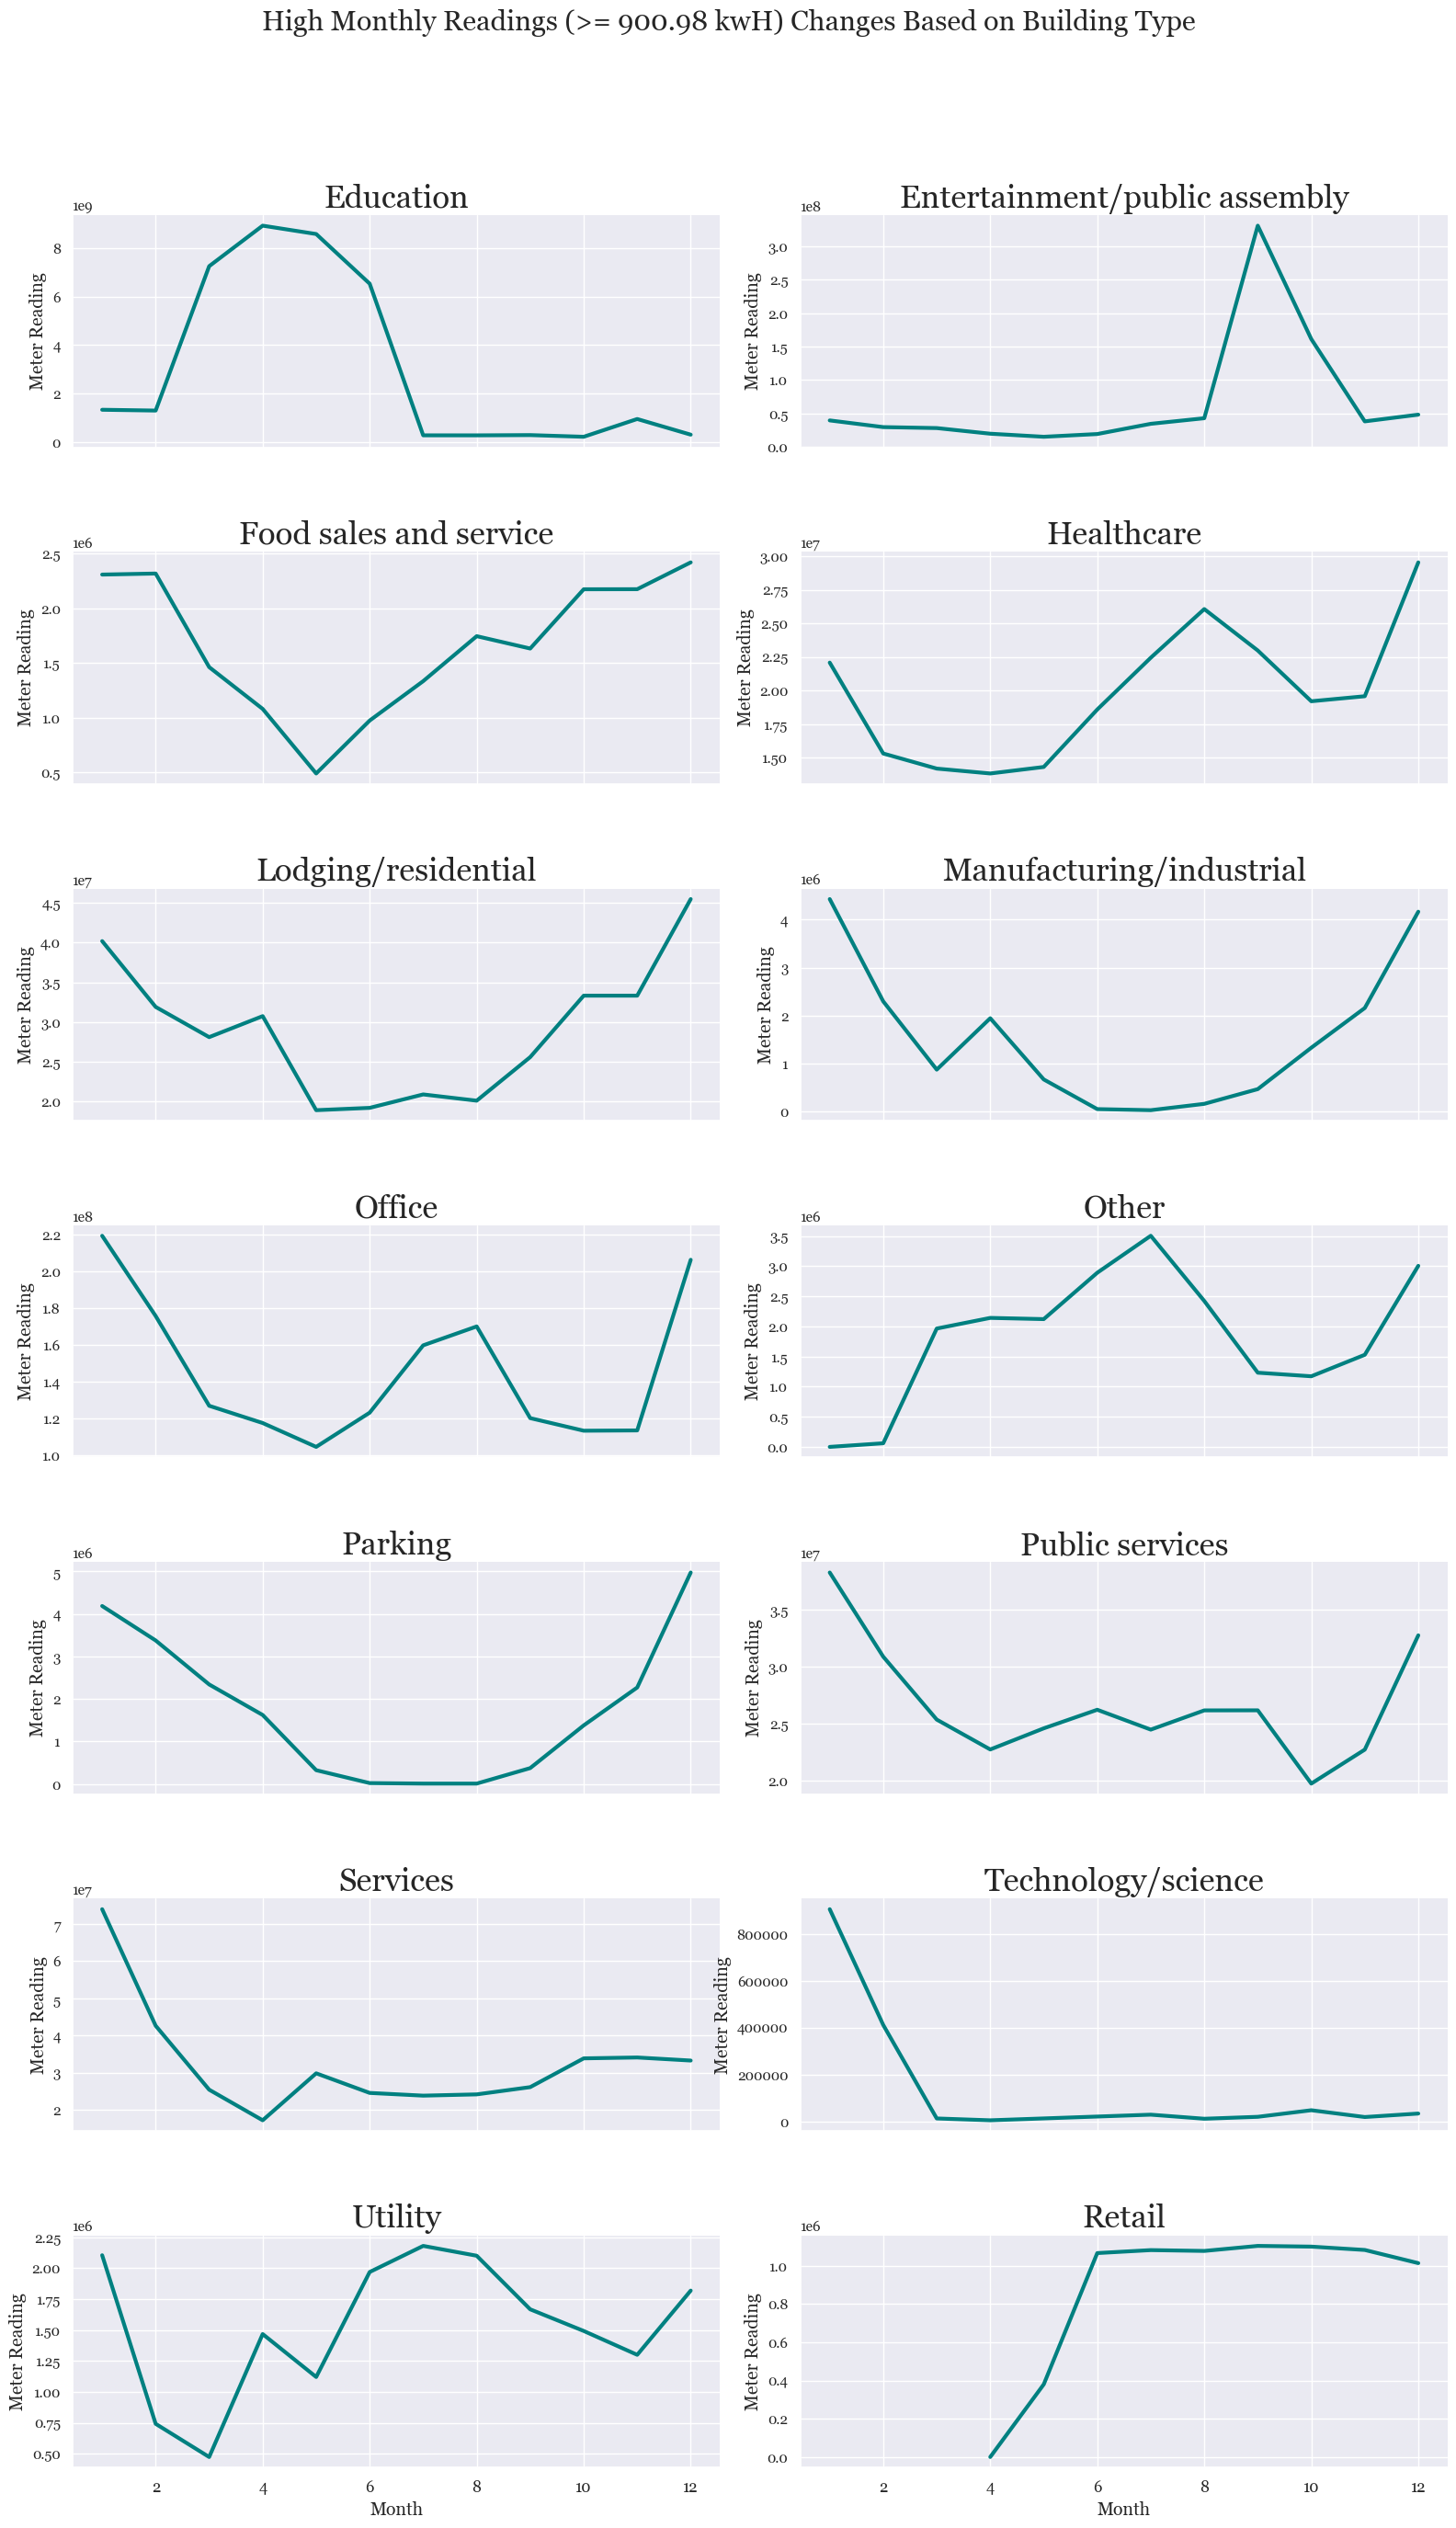

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of high meter readings
mean_high_meter_reading = 900.977  # or calculate dynamically if needed

# Filter the data for meter readings greater than mean_high_meter_reading
high_meter_data = train[train['meter_reading'] > mean_high_meter_reading]

# Group the filtered data by month and primary_use, then sum the meter readings
temp_df = high_meter_data.groupby(['month', 'primary_use'])['meter_reading'].sum().reset_index()

# Set the figure size and font
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'Georgia'

# Create the FacetGrid
g = sns.FacetGrid(temp_df, col="primary_use", col_wrap=2, height=4, aspect=2, sharey=False)
g.map(plt.plot, 'month', 'meter_reading', color="teal", linewidth=3)

# Adjust the spacing between plots
plt.subplots_adjust(hspace=0.45)

# Set the title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('High Monthly Readings (>= 900.98 kwH) Changes Based on Building Type', fontsize=22)

# Set the subplot titles with a larger font size
g.set_titles(col_template="{col_name}", size=25)

# Set x-axis labels with a larger font size
for ax in g.axes.flat:
    ax.set_xlabel('Month', fontsize=14)  # Set x-axis label with desired font size
    ax.set_ylabel('Meter Reading', fontsize=14)  # Ensure y-axis label is also set
    ax.tick_params(axis='x', labelsize=12)  # Set x-tick labels font size

# Show the plot
plt.show()


## By Hour and Week of the Day

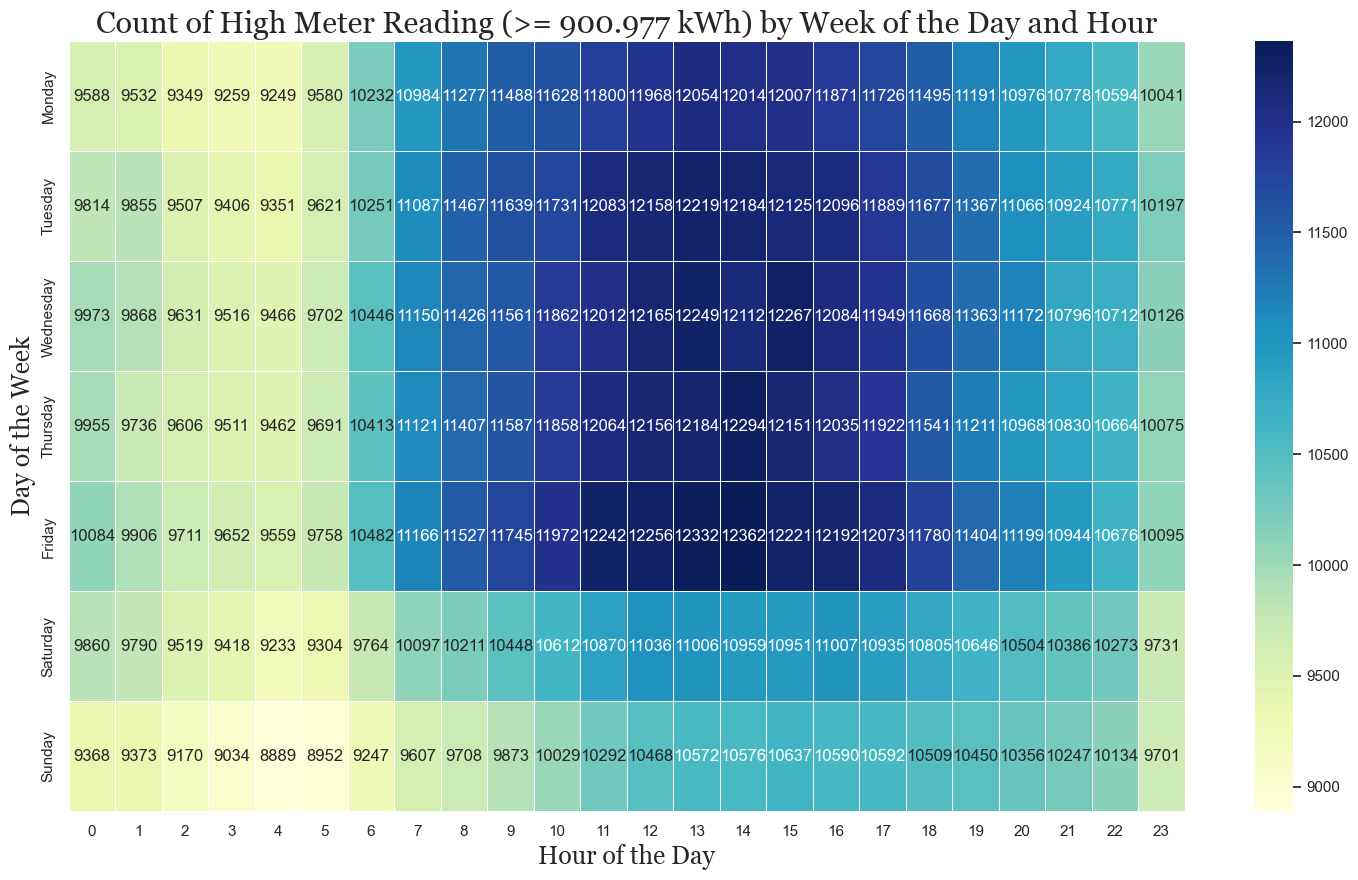

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out high meter readings
high_meter_data = train[train['meter_reading'] > 900.977]

# Convert timestamp to datetime
high_meter_data['timestamp'] = pd.to_datetime(high_meter_data['timestamp'])

# Extract weekday and hour
high_meter_data['weekday'] = high_meter_data['timestamp'].dt.day_name()
high_meter_data['hour'] = high_meter_data['timestamp'].dt.hour

# Set the figure size and style
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# Create a heatmap
heatmap_data = high_meter_data.pivot_table(index='weekday', columns='hour', values='meter_reading', aggfunc='count')

# Reorder the weekdays for better readability
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Plot the heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5, annot=True, fmt='g')

# Set the title and labels
plt.title('Count of High Meter Reading (>= 900.977 kWh) by Week of the Day and Hour', fontsize=22, fontname='Georgia')
plt.xlabel('Hour of the Day', fontsize=18, fontname='Georgia')
plt.ylabel('Day of the Week', fontsize=18, fontname='Georgia')

# Show the plot
plt.show()


### Wind Direction and Wind Speed

<Figure size 1800x1000 with 0 Axes>

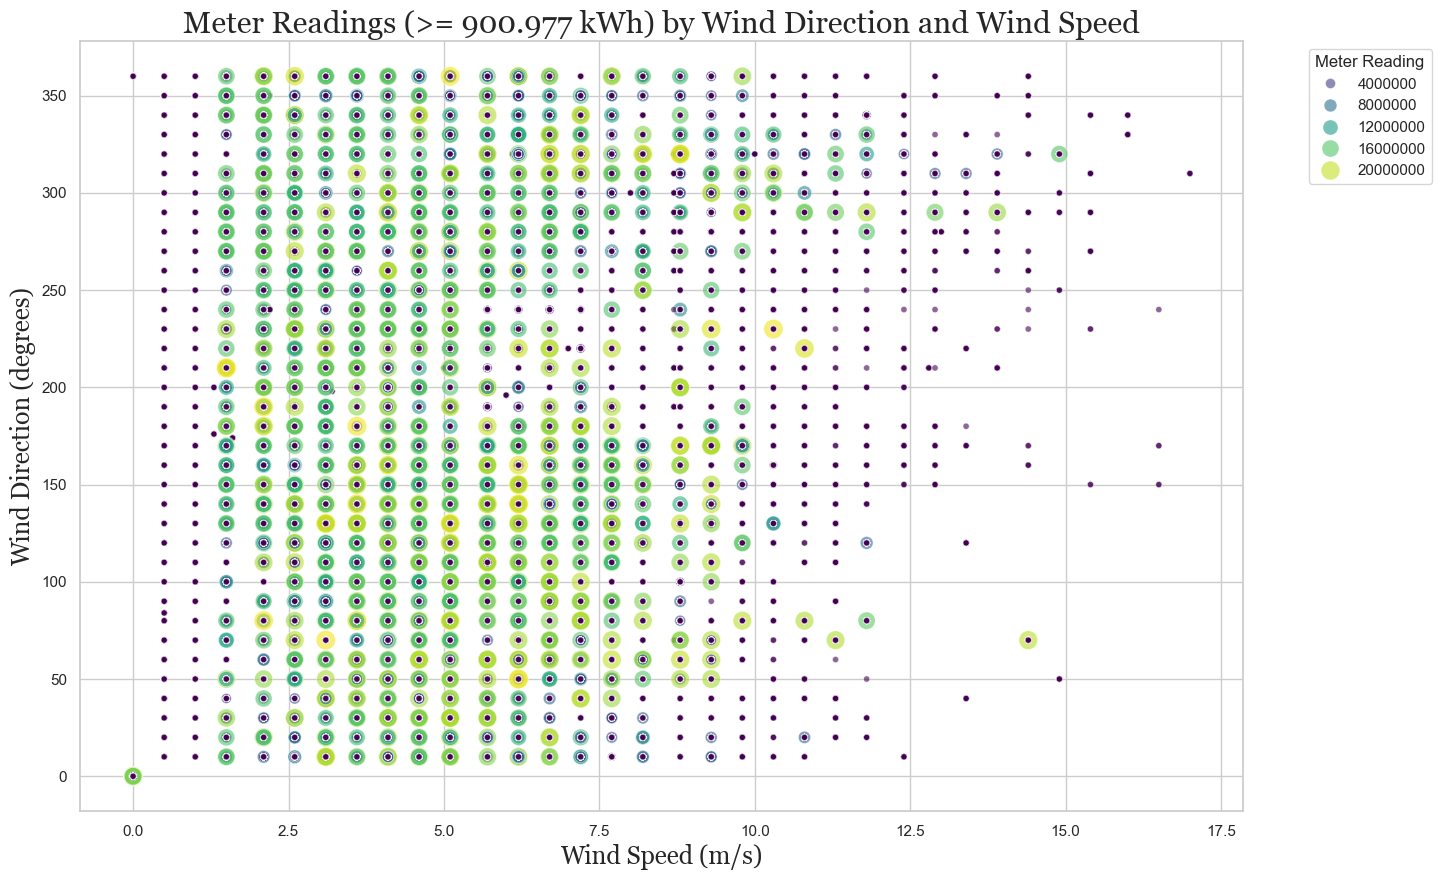

In [88]:

# Filter out high meter readings
high_meter_data = train[train['meter_reading'] > 900.977]

# Set the figure size and style
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=high_meter_data,
    x='wind_speed',
    y='wind_direction',
    hue='meter_reading',
    palette='viridis',
    size='meter_reading',
    sizes=(20, 200),
    alpha=0.6,
    edgecolor='w',
    linewidth=0.5
)

# Set the title and labels
plt.title('Meter Readings (>= 900.977 kWh) by Wind Direction and Wind Speed', fontsize=22, fontname='Georgia')
plt.xlabel('Wind Speed (m/s)', fontsize=18, fontname='Georgia')
plt.ylabel('Wind Direction (degrees)', fontsize=18, fontname='Georgia')

# Show the plot
plt.legend(title='Meter Reading', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Wind Direction

<Figure size 1200x800 with 0 Axes>

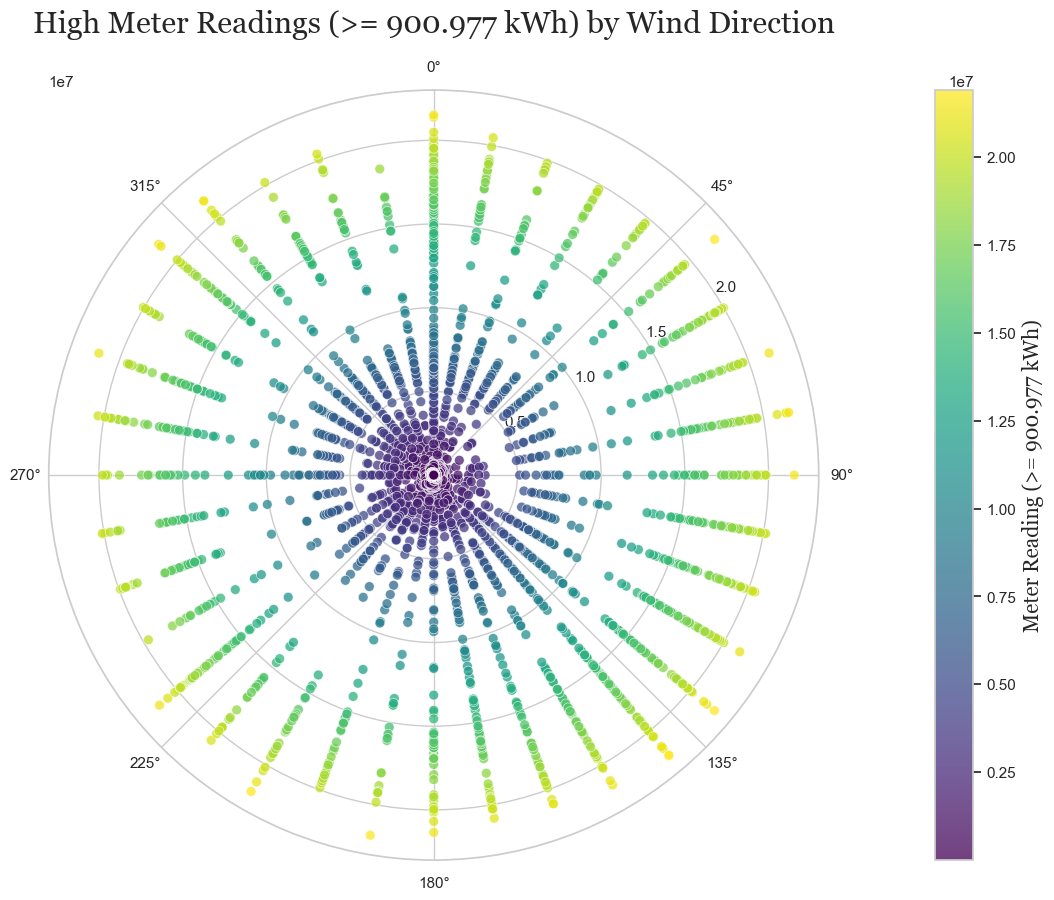

In [89]:

# Filter out high meter readings
high_meter_data = train[train['meter_reading'] > 900.977]

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the polar plot
angles = np.deg2rad(high_meter_data['wind_direction'])

plt.figure(figsize=(15, 10))
ax = plt.subplot(111, polar=True)
sc = ax.scatter(
    angles, high_meter_data['meter_reading'],
    c=high_meter_data['meter_reading'], cmap='viridis', alpha=0.75,
    edgecolor='w', linewidth=0.5, s=50
)

# Color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Meter Reading (>= 900.977 kWh)', fontsize=15, fontname='Georgia')

# Set the title and labels
plt.title('High Meter Readings (>= 900.977 kWh) by Wind Direction', fontsize=22, fontname='Georgia', pad=20)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(180/np.pi)

# Show the plot
plt.show()


## square feet

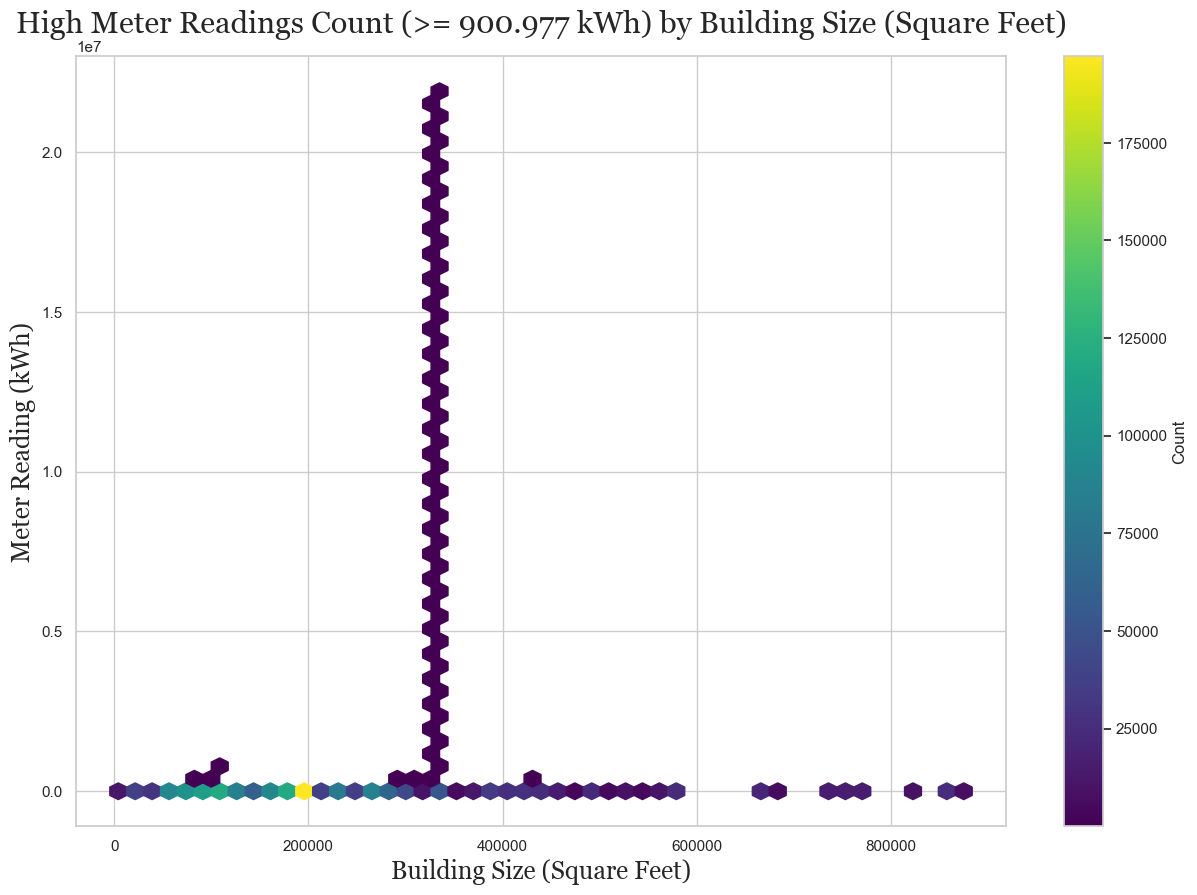

In [96]:

# Filter out high meter readings
high_meter_data = train[train['meter_reading'] > 900.977]

# Set the figure size and style
plt.figure(figsize=(15, 10))
plt.hexbin(high_meter_data['square_feet'], high_meter_data['meter_reading'], gridsize=50, cmap='viridis', mincnt=1)

# Add a color bar
cb = plt.colorbar(label='Count')

# Set the title and labels
plt.title('High Meter Readings Count (>= 900.977 kWh) by Building Size (Square Feet)', fontsize=22, fontname='Georgia')
plt.xlabel('Building Size (Square Feet)', fontsize=18, fontname='Georgia')
plt.ylabel('Meter Reading (kWh)', fontsize=18, fontname='Georgia')

# Show the plot
plt.show()


### Air Temperature and Dew Temperature

<Figure size 1500x1000 with 0 Axes>

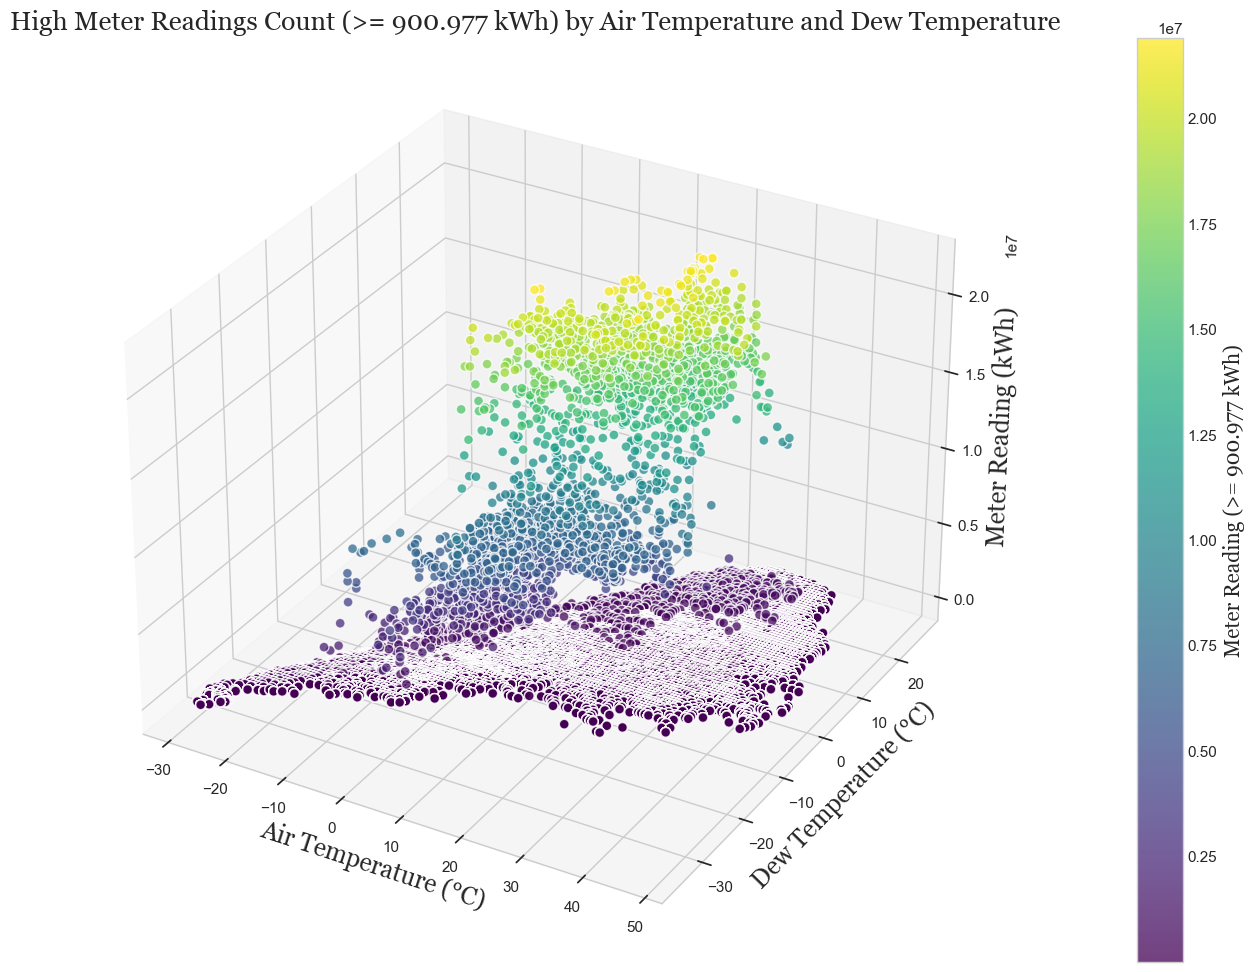

In [100]:

# Filter out high meter readings
high_meter_data = train[train['meter_reading'] > 900.977]

# Set the figure size and style
plt.figure(figsize=(15, 10))
plt.style.use('seaborn-whitegrid')

# Create a 3D scatter plot
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    high_meter_data['air_temperature'],
    high_meter_data['dew_temperature'],
    high_meter_data['meter_reading'],
    c=high_meter_data['meter_reading'],
    cmap='viridis',
    alpha=0.75,
    edgecolor='w',
    s=50
)

# Add color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Meter Reading (>= 900.977 kWh)', fontsize=15, fontname='Georgia')

# Set the title and labels
ax.set_title('High Meter Readings Count (>= 900.977 kWh) by Air Temperature and Dew Temperature', fontsize=19, fontname='Georgia')
ax.set_xlabel('Air Temperature (°C)', fontsize=18, fontname='Georgia')
ax.set_ylabel('Dew Temperature (°C)', fontsize=18, fontname='Georgia')
ax.set_zlabel('Meter Reading (kWh)', fontsize=18, fontname='Georgia')

# Show the plot
plt.show()


### Sea Level Pressure

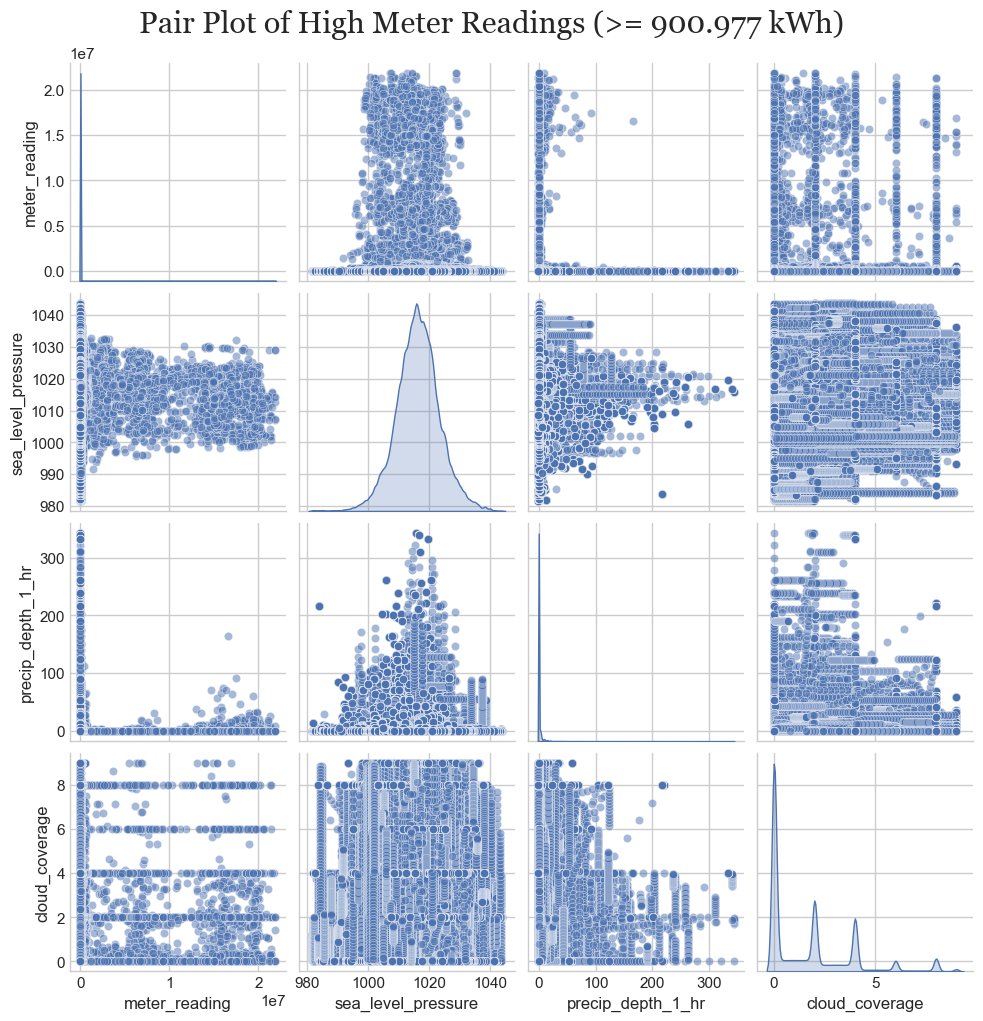

In [107]:

# Filter out high meter readings
high_meter_data = train[train['meter_reading'] > 900.977]

# Handle NaNs by interpolation or filling
high_meter_data['sea_level_pressure'] = high_meter_data['sea_level_pressure'].interpolate().fillna(method='bfill').fillna(method='ffill')
high_meter_data['precip_depth_1_hr'] = high_meter_data['precip_depth_1_hr'].interpolate().fillna(method='bfill').fillna(method='ffill')
high_meter_data['cloud_coverage'] = high_meter_data['cloud_coverage'].interpolate().fillna(method='bfill').fillna(method='ffill')

# Select relevant columns
columns_of_interest = ['meter_reading', 'sea_level_pressure', 'precip_depth_1_hr', 'cloud_coverage']

# Create a pair plot
sns.pairplot(high_meter_data[columns_of_interest], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of High Meter Readings (>= 900.977 kWh)', y=1.02, fontsize=22, fontname='Georgia')
plt.show()


In [10]:
train

building_id  meter           timestamp  meter_reading  hour  day  \
0                   0      0 2016-01-01 00:00:00          0.000     0    1   
1                   1      0 2016-01-01 00:00:00          0.000     0    1   
2                   2      0 2016-01-01 00:00:00          0.000     0    1   
3                   3      0 2016-01-01 00:00:00          0.000     0    1   
4                   4      0 2016-01-01 00:00:00          0.000     0    1   
...               ...    ...                 ...            ...   ...  ...   
20216095         1444      0 2016-12-31 23:00:00          8.750    23   31   
20216096         1445      0 2016-12-31 23:00:00          4.825    23   31   
20216097         1446      0 2016-12-31 23:00:00          0.000    23   31   
20216098         1447      0 2016-12-31 23:00:00        159.575    23   31   
20216099         1448      0 2016-12-31 23:00:00          2.850    23   31   

         weekday_name  weekday  month  
0              Friday        4      1  
1              Friday        4      1  
2              Friday        4      1  
3              Friday        4      1  
4              Friday        4      1  
...               ...      ...    ...  
20216095     Saturday        5     12  
20216096     Saturday        5     12  
20216097     Saturday        5     12  
20216098     Saturday        5     12  
20216099     Saturday        5     12  

[20216100 rows x 9 columns]

<Figure size 1800x1500 with 0 Axes>

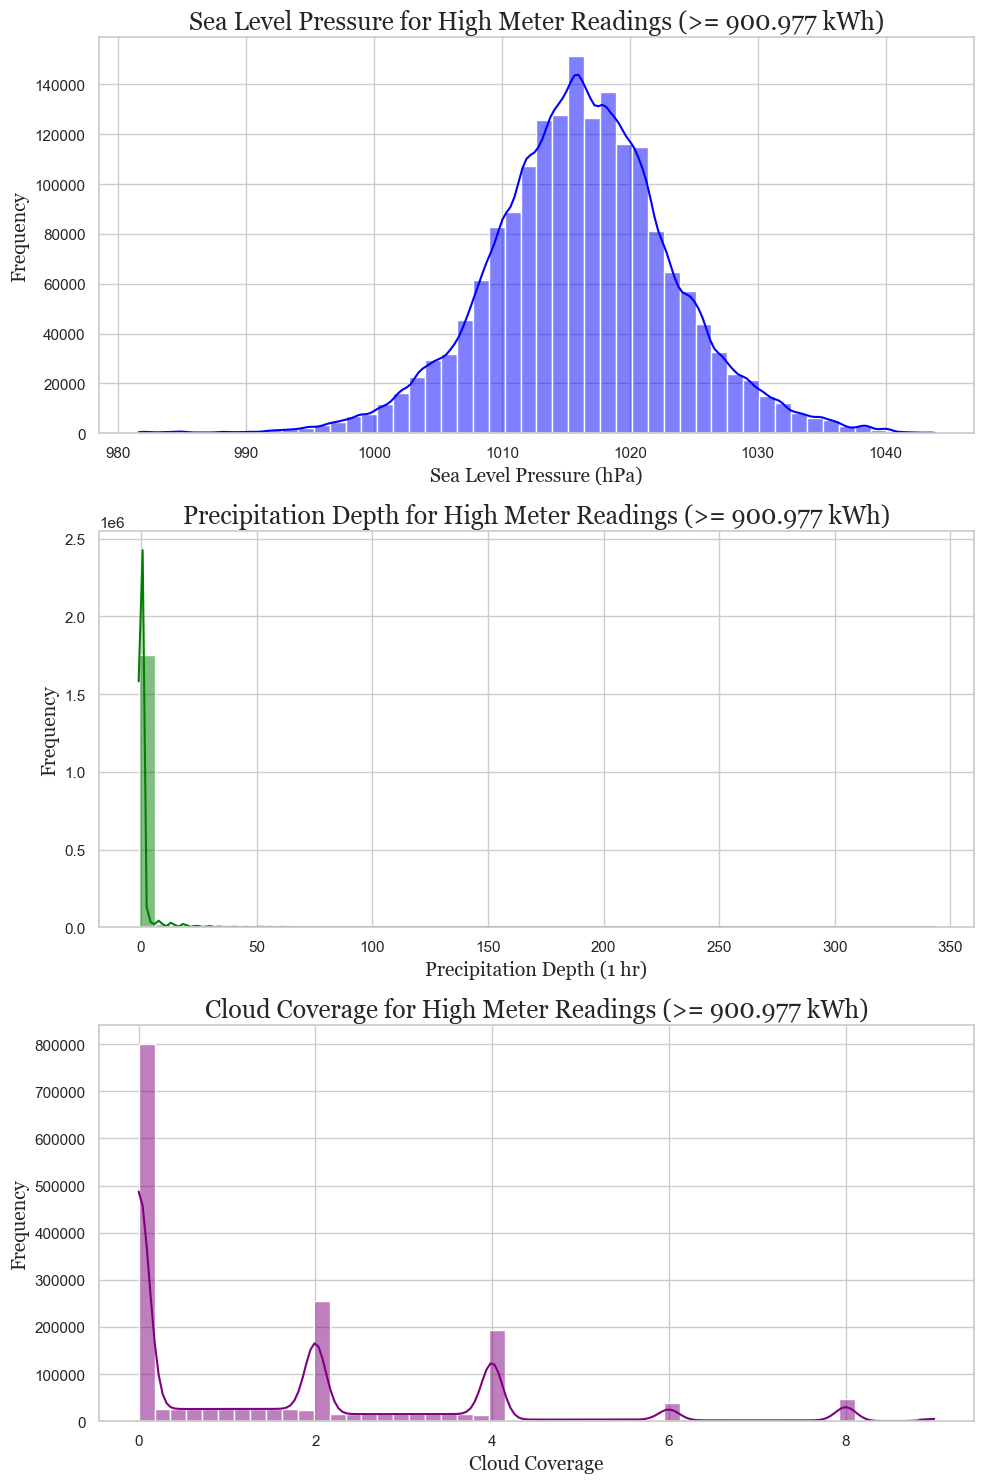

In [15]:

# Filter out high meter readings
high_meter_data = train[train['meter_reading'] > 900.977]

# Handle NaNs by interpolation or filling
high_meter_data['sea_level_pressure'] = high_meter_data['sea_level_pressure'].interpolate().fillna(method='bfill').fillna(method='ffill')


# Set the figure size and style
plt.figure(figsize=(18, 15))
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Sea Level Pressure Histogram
sns.histplot(high_meter_data['sea_level_pressure'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Sea Level Pressure for High Meter Readings (>= 900.977 kWh)', fontsize=18, fontname='Georgia')
axes[0].set_xlabel('Sea Level Pressure (hPa)', fontsize=14, fontname='Georgia')
axes[0].set_ylabel('Frequency', fontsize=14, fontname='Georgia')


# Adjust layout
plt.tight_layout()
plt.show()


## building type around 350,000 square feet in size

In [16]:

# Filter out high meter readings
high_meter_data = train[train['meter_reading'] > 900.977]

# Filter data to find buildings around 350,000 square feet
specific_size_data = high_meter_data[(high_meter_data['square_feet'] >= 340000) & (high_meter_data['square_feet'] <= 360000)]

# Check primary_use for buildings around 350,000 sq ft
primary_use_counts = specific_size_data['primary_use'].value_counts()
print(primary_use_counts)


Entertainment/public assembly    5445
Office                           3006
Public services                     4
Name: primary_use, dtype: int64
